<a href="https://colab.research.google.com/github/MBogushefsky/ML_Developer_Productivity/blob/main/developer_productivity_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./ai_dev_productivity.csv')

In [ ]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [ ]:
df.isnull().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
lr = LogisticRegression(max_iter=1000)
X = df.drop(['task_success'], axis=1)
y = df[['task_success']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model = lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model.score(X_test, y_test)

0.89

In [ ]:
lr.coef_

array([[ 0.06705827,  0.02454101, -0.22743187,  0.41182009, -0.09557061,
        -0.61633614, -0.18387884, -0.2298354 ]])

In [ ]:
abs_coef = np.abs(lr.coef_)

In [ ]:
feature_df = pd.DataFrame({'Features': X.columns, 'Abs Coefficient': abs_coef[0] })
feature_sorted_df = feature_df.sort_values('Abs Coefficient', ascending=True)

<BarContainer object of 8 artists>

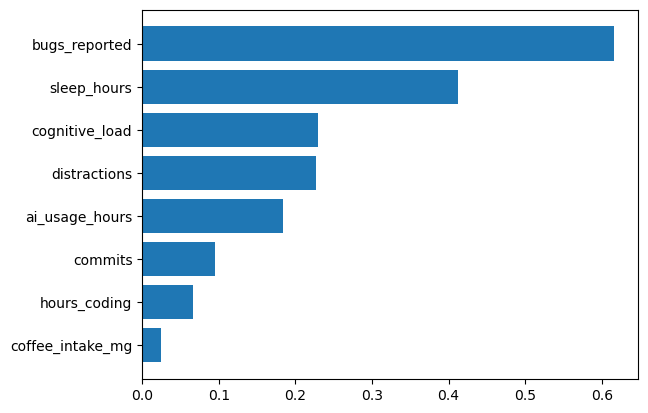

In [ ]:
plt.barh(feature_sorted_df['Features'], width=feature_sorted_df['Abs Coefficient'])